<a href="https://colab.research.google.com/github/DavideScassola/data_analysys_laboratory/blob/main/notebooks/casa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisi Dati: Efficientamento Energetico
<img src="https://www.pozzicase.it/sites/default/files/styles/immagine_wide_blocco_a/public/casa/main.jpg?itok=jVvRVwpp" width="700">

Abbiamo trovato [qui](https://stat.ethz.ch/R-manual/R-devel/library/MASS/html/whiteside.html) dei dati riguardo al consumo di gas una casa, la cui descrizione è la seguente:

_"Mr Derek Whiteside of the UK Building Research Station recorded the weekly gas consumption and average external temperature at his own house in south-east England for two heating seasons, one of 26 weeks before, and one of 30 weeks after cavity-wall insulation was installed. The object of the exercise was to assess the effect of the insulation on gas consumption."_

Sembra interessante! Forse questi dati ci aiuteranno a capire se vale la pena investire nell'efficientamento energetico di una casa.

In [67]:
# Importiamo le librerie necessarie
import pandas as pd
import matplotlib.pyplot as plt

Prima di tutto, dobbiamo scaricare i dati e vedere di cosa si tratta

In [68]:
# Scarichiamo i dati e li mettiamo in un DataFrame
LINK_DATI = 'https://www.dropbox.com/scl/fi/dz7zvitffxe5qk0ylb20j/whiteside.csv?rlkey=kpjp3pnte5raproyluivqmrz4&dl=1'
df = pd.read_csv(LINK_DATI)

Bene, ora che abbiamo caricato il dataset, possiamo vedere quali colonne ha la nostra tabella.

In [69]:
df

,Insul,Temp,Gas
0,Before,-0.8,7.2
1,Before,-0.7,6.9
2,Before,0.4,6.4
3,Before,2.5,6.0
4,Before,2.9,5.8
5,Before,3.2,5.8
6,Before,3.6,5.6
7,Before,3.9,4.7
8,Before,4.2,5.8
9,Before,4.3,5.2


La tabella ha 3 colonne e 56 righe:
- "Insul" indica se alla casa è stato fatto l'intervento di efficientamento energetico (probabilmente il cappotto termico). I valori possibili sono solo "Before" e "After".
- "Temp" è la temperatura esterna media di una data settimana
- "Gas" indica il consumo totale per una data settimana

Vogliamo vedere se dopo aver messo il cappotto termico il consumo di gas si è abbassato.
Possiamo iniziare calcolando la media del consumo di gas settimanale prima e dopo l'intervento:

In [70]:
# Per facilitarci la vita, creiamo due dataframe separati per i dati prima e dopo l'isolamento
df_before = df[df['Insul']=='Before'].reset_index(drop=True)
df_after = df[df['Insul']=='After'].reset_index(drop=True)

In [71]:
df_before

,Insul,Temp,Gas
0,Before,-0.8,7.2
1,Before,-0.7,6.9
2,Before,0.4,6.4
3,Before,2.5,6.0
4,Before,2.9,5.8
5,Before,3.2,5.8
6,Before,3.6,5.6
7,Before,3.9,4.7
8,Before,4.2,5.8
9,Before,4.3,5.2


In [72]:
df_after

,Insul,Temp,Gas
0,After,-0.7,4.8
1,After,0.8,4.6
2,After,1.0,4.7
3,After,1.4,4.0
4,After,1.5,4.2
5,After,1.6,4.2
6,After,2.3,4.1
7,After,2.5,4.0
8,After,2.5,3.5
9,After,3.1,3.2


In [73]:
# Ora calcoliamo la media del consumo di gas prima e dopo l'isolamento
consumo_medio_prima = df_before['Gas'].mean()
consumo_medio_dopo = df_after['Gas'].mean()

print(f'Consumo gas medio prima: {consumo_medio_prima:.2f}')
print(f'Consumo gas medio dopo: {consumo_medio_dopo:.2f}')

Consumo gas medio prima: 4.75
Consumo gas medio dopo: 3.48


Bene! A quanto pare il consumo medio è inferiore dopo l'intervento. Ma questa informazione è sufficiente? Se la temperatura media fosse stata superiore allora avremmo comunque avuto bisgno di meno gas per riscaldare la casa. Quello che vogliamo verificare è che, a parità di temperatura esterna, il consumo di gas sia inferiore.
In ogni caso possiamo controllare anche la media delle temperature:

In [74]:
temperatura_media_prima = df_before['Temp'].mean()
temperatura_media_dopo = df_after['Temp'].mean()

print(f'Temperatura media prima: {temperatura_media_prima:.2f} C°')
print(f'Temperatura media dopo: {temperatura_media_dopo:.2f} C°')

Temperatura media prima: 5.35 C°
Temperatura media dopo: 4.46 C°


Se vogliamo scoprire qualcosa sulla relazione tra temperatura esterna, consumo di gas e isolamente termico possiamo fare un grafico in cui mostriamo tutte e 3 queste caratteristiche. Iniziamo usando l'asse delle x per rappresentare la temperatura e l'asse delle y per il consumo di gas:

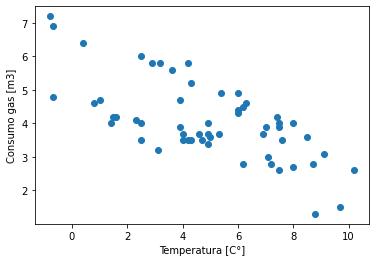

In [75]:
plt.plot(df['Temp'], df['Gas'], 'o')
plt.xlabel('Temperatura [C°]')
_ = plt.ylabel('Consumo gas [m3]')

E' evidente che il consumo di gas è più alto quando fa più freddo.
Ma ora proviamo a considerare anche l'isolamento termico. Possiamo mostrare le osservazioni prima e dopo l'intervento con un colore diverso:

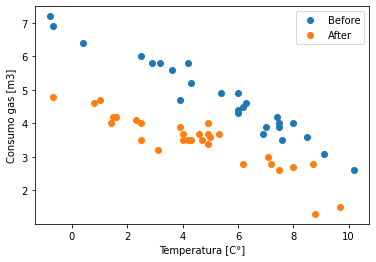

In [76]:
# prima mostriamo i dati prima dell'isolamento
plt.plot(df_before['Temp'], df_before['Gas'], 'o', label='Before')

# ora aggiungiamo i dati dopo dell'isolamento
plt.plot(df_after['Temp'], df_after['Gas'], 'o', label='After')

plt.legend()
plt.xlabel('Temperatura [C°]')
_ = plt.ylabel('Consumo gas [m3]')

Da questo grafico si vede come, a parità di temperatura, il consumo di gas è inferiore dopo l'isolamento.

Ora però dobbiamo quantificare quanto si risparmia in termini di gas, data una qualsiasi temperatura!
Per fare ciò abbiamo bisogno di costruire un **modello**, cioè una funzione (o regola) che prende in input la temperatura esterna e se la casa ha subito l'intervento o no (prima o dopo), e restituisce una "predizione" del consumo di gas:

$$gas(temperatura, isolamento)$$

In particolare vogliamo construire un **modello statistico**, perchè il modello imparerà dai dati che gli diamo.

Iniziamo con un modello molto semplice che predice il consumo di gas sapendo la temperatura esterna (per adesso ignoriamo l'isolamento). Il modello più semplice è il modello lineare, cioè:

$$gas(temperatura) = h + m \cdot temperatura$$

Per costruire questo modello, dobbiamo trovare dei valori di $h$ ed $m$ tali per cui, se prendiamo una qualsiasi riga del nostro dataset, cioè una coppia di valori
$(t, g)$, dove $t$ è la temperatura e $g$ è il consumo di gas (per esempio $t=0.8$ e $g=7.2$) allora si verifica che $g \approx gas(t) = h + m \cdot t$, per esempio $7.2 \approx gas(-0.8) = h + m \cdot (-0.8)$. 

Come troviamo questi valori, detti **parametri**, per $h$ ad $m$? Non dobbiamo preoccuparci, per questo esiste una libreria che farà tutto!

In [77]:
# Importiamo la classe LinearRegression dalla libreria
from sklearn.linear_model import LinearRegression

# Creiamo un modello di regressione lineare e addestriamolo
model = LinearRegression()
model.fit(X=df[['Temp']], # X è l'input del modello, in questo caso la temperatura
          y=df['Gas']) # y è l'output del modello, in questo caso il consumo di gas

# Mostriamo i parametri stimati del modello
print(f'Coefficiente (m): {model.coef_[0]:.2f}')
print(f'Intercetta (h): {model.intercept_:.2f}')

# Come misura di qualità del modello, calcoliamo il coefficiente R^2
r_squared = model.score(df[['Temp']], df['Gas'])
print(f'R_squared: {r_squared:.2f}')

Coefficiente (m): -0.29
Intercetta (h): 5.49
R_squared: 0.47


Quindi il modello appreso è

$$ gas(temperatura) = 5.49 -0.29 \cdot temperatura $$

Possiamo vedere la predizione del nostro modello insieme ai dati:

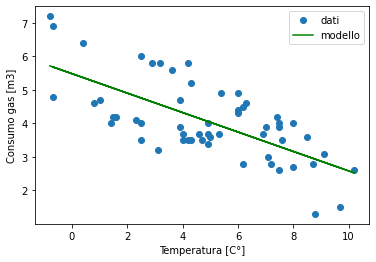

In [78]:
# Come prima, mostriamo tutti dati
plt.plot(df['Temp'], df['Gas'], 'o', label='dati')

# Mostriamo la predizione del modello per ogni punto (unite da una linea continua!)
plt.plot(df['Temp'], model.predict(df[['Temp']]), '-', color='green', label='modello')

plt.xlabel('Temperatura [C°]')
plt.ylabel('Consumo gas [m3]')
_ = plt.legend()

Questo ci mostra semplicemente una relazione tra la temperatura esterna e il consumo di gas. Ma noi siamo interessati al contributo dell'isolamento termico al consumo di gas, quindi dobbiamo aggiungere la variabile "isolamento" al nostro modello: $ gas(temperatura, isolamento) $.

Come possiamo estendere il nostro modello lineare? L'isolamento non è neanche un numero, le colonne sono delle stringhe "Before" e "After". Cosa si può fare quando una variabile non è un numero, ma una **categoria**?

La risposta non è univoca, ma in questo caso esiste una possibile soluzione molto semplice: sostituiamo "Before" con 0 e "After" con 1. Adesso il modello lineare può essere costruito, perchè ora "isolamento" è un numero:

$$gas(temperatura, isolamento) = h + m \cdot temperatura + p \cdot isolamento$$

Le variabili che vengono estratte da delle categorie in questo modo vengono chiamate **dummy variables**.

In [79]:
# per chiarezza, costruiamo una tabella solo per questo modello
X = df[['Temp']].copy()

# aggiungiamo la colonna "dummy variable" per l'isolamento
X['Insul_dummy'] = (df['Insul']=='After')*1 # trucco per trasformare False in 0 e True in 1!

# Variable da predire
y = df['Gas']

X

,Temp,Insul_dummy
0,-0.8,0
1,-0.7,0
2,0.4,0
3,2.5,0
4,2.9,0
5,3.2,0
6,3.6,0
7,3.9,0
8,4.2,0
9,4.3,0


In [80]:
# Modello lineare
model = LinearRegression()
model.fit(X=X, y=y)

r_squared = model.score(X, y)

print(f'Coefficiente (m): {model.coef_[0]:.2f}')
print(f'Coefficiente (p): {model.coef_[1]:.2f}')
print(f'Intercetta (h): {model.intercept_:.2f}')
print(f'R_squared: {r_squared:.2f}')

Coefficiente (m): -0.34
Coefficiente (p): -1.57
Intercetta (h): 6.55
R_squared: 0.91


Quindi il modello imparato è:
$$ gas(temperatura, isolamento) = 6.55 -0.34 \cdot temperatura - 1.57 \cdot isolamento$$

Un modo equivalente per scrivere questa formula è:

$$
gas(temperatura, isolamento) = 
\begin{cases} 
6.55 -0.34 \cdot temperatura & \text{if } isolamento= 0 \ (Before) \\
(6.55-1.57) -0.34 \cdot temperatura& \text{if } isolamento= 1 \ (After)
\end{cases}
$$

Questo equivale ad evere un modello lineare la cui intercetta cambia in base alla variabile "isolamento".

Possiamo visualizzare questo modello con due linee distinte:

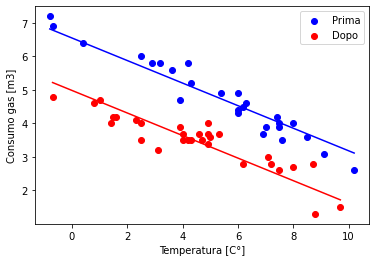

In [81]:
# Mostriamo i dati prima dell'isolamento, insieme alla predizione per questi punti
before = X['Insul_dummy']==0
X_before = X[before]
y_before = y[before]
plt.scatter(X_before['Temp'], y_before, color='blue', label = 'Prima')
plt.plot(X_before['Temp'], model.predict(X_before), color='blue')

# Mostriamo i dati dopo dell'isolamento, insieme alla predizione per questi punti
after = X['Insul_dummy']==1
X_after = X[after]
y_after = y[after]
plt.scatter(X_after['Temp'], y_after, color='red', label = 'Dopo')
plt.plot(X_after['Temp'], model.predict(X_after), color='red')

plt.xlabel('Temperatura [C°]')
plt.ylabel('Consumo gas [m3]')
_ = plt.legend()

Ora possiamo finalmente rispondere alla nostra domanda iniziale: quanto gas viene risparmiato dalla casa grazie all'intervento per l'isolamento termico?

Ora che abbiamo il modello $gas(temperatura, isolamento)$ possiamo stimare il risparmio facendo la differenza tra il consumo stimato senza isolamento e con l'isolamento:

$$gas(temperatura, \text{Before}) - gas(temperatura, \text{After})$$

$$ = 6.55 -0.34 \cdot temperatura - ((6.55-1.57) -0.34 \cdot temperatura) = 1.57$$

Si può fare di meglio? Questo modello non fa altro che definire due intercette diverse in base all'isolamento, ma la pendenza della retta rimane la stessa (le due mostrate sono parallele). Infatti, il risparmio stimato è un valore fisso e non dipende dalla temperatura, il che è discutibile. Un modo per introdurre anche due coefficienti $m$ diversi è quello di stimare due modelli lineari distinti, uno per misurazioni senza isolamento e uno con l'isolamento.

Coefficiente (m_before): -0.39
Intercetta (h_before): 6.85
Coefficiente (m_after): -0.28
Intercetta (h_after): 4.72


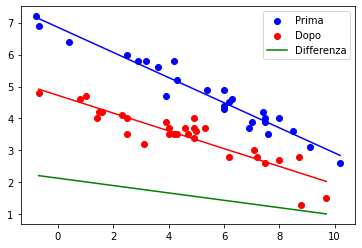

In [82]:
# Creiamo due modelli distinti

# Prima dell'isolamento
X_before = df_before[['Temp']].copy()
y_before = df_before['Gas']
model_before = LinearRegression()
model_before.fit(X_before, y_before)

print(f'Coefficiente (m_before): {model_before.coef_[0]:.2f}')
print(f'Intercetta (h_before): {model_before.intercept_:.2f}')


# Dopo l'isolamento
X_after = df_after[['Temp']].copy()
y_after = df_after['Gas']
model_after = LinearRegression()
model_after.fit(X_after, y_after)

print(f'Coefficiente (m_after): {model_after.coef_[0]:.2f}')
print(f'Intercetta (h_after): {model_after.intercept_:.2f}')

# Ora mostriamo le predizioni dei due modelli
plt.scatter(X_before['Temp'], y_before, color='blue', label = 'Prima')
plt.plot(X_before['Temp'], model_before.predict(X_before), color='blue')

plt.scatter(X_after['Temp'], y_after, color='red', label = 'Dopo')
plt.plot(X_after['Temp'], model_after.predict(X_after), color='red')

# ora mostriamo la differenza tra le due predizioni
plt.plot(X_after['Temp'], model_before.predict(X_after) - model_after.predict(X_after), color = 'green', label='Differenza')
_ = plt.legend()

Considerando questo modello:

$$
gas(temperatura, isolamento) = 
\begin{cases} 
6.85 -0.39 \cdot temperatura & \text{if } isolamento= 0 \ (Before) \\
4.72 -0.28 \cdot temperatura & \text{if } isolamento= 1 \ (After)
\end{cases}
$$

Allora abbiamo che:

$$risparmio(temperatura) = gas(temperatura, \text{Before}) - gas(temperatura, \text{After}) = 2.13 - 0.11 \cdot temperatura$$

Questo risultato è simile al precedente. Notiamo che la differenza misura il risparmio in termini assoluti, potrebbe invece essere più adeguato considerare il risparmio in termini relativi (cioè in percentuale):

$$\frac{gas(temperatura, \text{After})}{gas(temperatura, \text{Before})}$$

ad esempio, quando la temperatura è di 0 gradi, abbiamo

$$\frac{gas(0, \text{After})}{gas(0, \text{Before})} = \frac{6.85 -0.39 \cdot 0}{4.72 -0.28 \cdot 0} = \frac{4.72}{6.85} \approx 69\%$$

Cioè a 0 gradi si stima un risparmio di circa il $31\%$ . 